In [1]:
%matplotlib inline


# Plot Readout Efficiency, Busy stuff, etc. versus Layer, at different Event Rates


This notebook analyzes the Alpide_stats.csv file from several simulation runs.

Specify the event rate and path to simulation run results you want to include in the plot, in the sim_dirs variable.


Note:
- It is only calculated/plotted for the first stave of each layer
- Specify simulation type (e.g. PbPb or pp) in sim_type - it will appear in the legend then


In [35]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FormatStrFormatter
from dataclasses import dataclass

@dataclass
class SimData:
    detector_pixels_read_out: int
    detector_pixels_lost: int
    detector_pixel_readout_efficiency: float
    detector_pixel_readout_loss: float
    
    # Each field below is per layer (layer is the key in dict)
    layer_pixels_read_out: dict()
    layer_pixels_lost: dict()
    layer_pixel_readout_efficiency: dict()
    layer_pixel_readout_loss: dict()

# Simulation directories, with a label that describes the data
sim_dirs = (('Triggered - 100 ns strobe', '/scratch/ProtonCT/sim_output_pct/run_0'),
            ('Triggered - 5 us strobe', '/scratch/ProtonCT/sim_output_pct/run_1'),
            ('Continuous - 5  us strobe', '/scratch/ProtonCT/sim_output_pct/run_2'),
            ('Triggered - 10 us strobe', '/scratch/ProtonCT/sim_output_pct/run_3'),
            ('Continuous - 10 us strobe', '/scratch/ProtonCT/sim_output_pct/run_4'),
            ('Triggered - 15 us strobe', '/scratch/ProtonCT/sim_output_pct/run_5'),
            ('Continuous - 15 us strobe', '/scratch/ProtonCT/sim_output_pct/run_6'),
            ('Triggered - 20 us strobe', '/scratch/ProtonCT/sim_output_pct/run_7'),
            ('Continuous - 20 us strobe', '/scratch/ProtonCT/sim_output_pct/run_8'),
            ('Triggered - 30 us strobe', '/scratch/ProtonCT/sim_output_pct/run_9'),
            ('Continuous - 30 us strobe', '/scratch/ProtonCT/sim_output_pct/run_10'))
sim_type = "pCT"
sim_additional_title = "1E7 protons/second"
plot_output_dir = '/scratch/ProtonCT/plots'

save_plots = True
print_values = False

#pixels_read_out = dict()
#pixels_not_read_out = dict()
#pixels_total = dict()
#pixel_readout_efficiency = dict()
#pixel_readout_loss = dict()

sim_data_all = dict()

chips_per_stave = 9
staves_per_layer = 12
chips_per_layer = chips_per_stave*staves_per_layer


# Create plot output directory
if save_plots:
    if not os.path.exists(plot_output_dir):
        os.makedirs(plot_output_dir)


for sim_label,dir in sim_dirs:
    
    sim_data = SimData(0, 0, 0.0, 0.0, dict(), dict(), dict(), dict())
    
    with open(dir + '/untriggered_readout_stats.csv') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=';')

        #pixels_read_out[sim_label] = 0
        #pixels_not_read_out[sim_label] = 0
        
        for row in csv_reader:
            layer = -1
            for col in row:
                if col == 'Chip ID':
                    chip_id = int(row[col])
                    layer = math.floor(chip_id/chips_per_layer)
                    
                    if not layer in sim_data.layer_pixels_read_out:
                        sim_data.layer_pixels_read_out[layer] = 0
                        sim_data.layer_pixels_lost[layer] = 0
                        
                if col != 'Chip ID':
                    if(int(col) == 0):
                        # Pixels that were not read out, for a given chip
                        sim_data.layer_pixels_lost[layer] += int(row[col])
                        sim_data.detector_pixels_lost += int(row[col])
                    else:
                        # Pixels that were read out at least once
                        sim_data.layer_pixels_read_out[layer] += int(row[col])
                        sim_data.detector_pixels_read_out += int(row[col])

    for layer in sim_data.layer_pixels_read_out:
        num_pixels_in_layer = sim_data.layer_pixels_read_out[layer] + sim_data.layer_pixels_lost[layer]  
        sim_data.layer_pixel_readout_efficiency[layer] = 100.0 * (sim_data.layer_pixels_read_out[layer] / float(num_pixels_in_layer))
        sim_data.layer_pixel_readout_loss[layer] = 100.0 * (sim_data.layer_pixels_lost[layer] / float(num_pixels_in_layer))
        
    num_pixels_in_detector = sim_data.detector_pixels_read_out + sim_data.detector_pixels_lost
    
    sim_data.detector_pixel_readout_efficiency = 100.0 * (sim_data.detector_pixels_read_out / float(num_pixels_in_detector))
    sim_data.detector_pixel_readout_loss = 100.0 * (sim_data.detector_pixels_lost / float(num_pixels_in_detector))
    
    sim_data_all[sim_label] = sim_data
    
    if print_values:
        print(sim_label)
        print('Pixels total: ', num_pixels_in_detector)
        print('Pixels read out: ', sim_data.detector_pixels_read_out)
        print('Pixels lost: ', sim_data.detector_pixels_lost)
        print('Pixels readout efficiency: ' + str(sim_data.detector_pixel_readout_efficiency) +'%')
        print('Pixels readout loss: ' + str(sim_data.detector_pixel_readout_loss) + '%')
        
        for layer in sim_data.layer_pixels_read_out:
            num_pixels_in_layer = sim_data.layer_pixels_read_out[layer] + sim_data.layer_pixels_lost[layer]
            print('Layer: ', layer)
            print('Pixels total: ', num_pixels_in_layer)
            print('Pixels read out: ', sim_data.layer_pixels_read_out[layer])
            print('Pixels lost: ', sim_data.layer_pixels_lost[layer])
            print('Pixels readout efficiency: ' + str(sim_data.layer_pixel_readout_efficiency[layer]) +'%')
            print('Pixels readout loss: ' + str(sim_data.layer_pixel_readout_loss[layer]) + '%')
        
        print('\n\n')

# Plot Pixel Readout Efficiency and Loss

layers:  (0, 5, 10, 15, 20, 25, 30, 35, 40)
efficiency_data: (100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0)
loss_data: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
layers:  (0, 5, 10, 15, 20, 25, 30, 35, 40)
efficiency_data: (99.95577201157282, 99.97921702143469, 99.99615646745154, 99.9989183787347, 99.99995937586708, 100.0, 100.0, 100.0, 100.0)
loss_data: (0.044227988427176845, 0.020782978565319098, 0.003843532548468049, 0.0010816212652921449, 4.0624132928662804e-05, 0.0, 0.0, 0.0, 0.0)
layers:  (0, 5, 10, 15, 20, 25, 30, 35, 40)
efficiency_data: (99.83353494454035, 99.89017965710889, 99.94484806644567, 99.96791834068482, 99.98691902919697, 99.9955503252862, 99.9996168976098, 99.9997137006411, 99.99994900046002)
loss_data: (0.16646505545965767, 0.10982034289110858, 0.055151933554333385, 0.032081659315183086, 0.013080970803029423, 0.004449674713803554, 0.0003831023901983479, 0.0002862993589041606, 5.099953998414934e-05)
layers:  (0, 5, 10, 15, 20, 25, 30, 35, 40)
effi

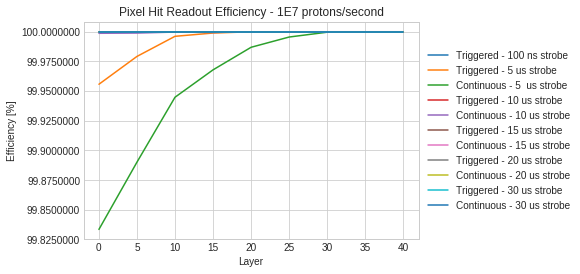

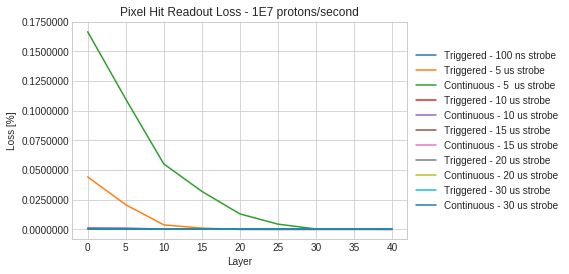

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:
plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#fig, ax = plt.subplots(2)
fig1 = plt.figure(1)
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))

fig2 = plt.figure(2)
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))

#ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.7f'))
#ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.7f'))


width = 0.6       # the width of the bars: can also be len(x) sequence

plots_efficiency = dict()
plots_loss = dict()

#names,values = zip(*pixel_readout_efficiency.items())
#x_vals = np.arange(0, len(names))
#plt.bar(names, values)
#plt.legend(names)
#plt.show()

#print(names)

for sim_label in sim_data_all:
    list_efficiency_data = sorted(sim_data_all[sim_label].layer_pixel_readout_efficiency.items())
    list_loss_data = sorted(sim_data_all[sim_label].layer_pixel_readout_loss.items())

    layers, efficiency_data = zip(*list_efficiency_data)
    layers, loss_data = zip(*list_loss_data)
    
    print('layers: ', layers)
    print('efficiency_data:', efficiency_data)
    print('loss_data:', loss_data)
    
    #plots_efficiency[sim_label] = ax[0].plot(layers, efficiency_data, label=sim_label)
    #plots_loss[sim_label] = ax[1].plot(layers, loss_data, label=sim_label)
    plt.figure(1)
    plots_efficiency[sim_label] = plt.plot(layers, efficiency_data, label=sim_label)
    plt.figure(2)
    plots_loss[sim_label] = plt.plot(layers, loss_data, label=sim_label)
    
#additional_title = ''
#if len(sim_additional_title) > 0:
#    additional_title = ' - ' + sim_additional_title


#ax[0].set_title('Pixel Hit Readout Efficiency - ' + sim_additional_title)
#ax[0].set_xlabel('Layer')
#ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax[1].set_title('Pixel Hit Readout Loss - ' + sim_additional_title)
#ax[1].set_xlabel('Layer')
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))



plt.figure(1)
ax = plt.gca()
ax.set_title('Pixel Hit Readout Efficiency - ' + sim_additional_title)
ax.set_xlabel('Layer')
ax.set_ylabel('Efficiency [%]')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plt.figure(2)
ax = plt.gca()
ax.set_title('Pixel Hit Readout Loss - ' + sim_additional_title)
ax.set_xlabel('Layer')
ax.set_ylabel('Loss [%]')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


if save_plots:
    plt.figure(1)
    fig1.savefig(plot_output_dir + '/pixel_hit_readout_efficiency.png', bbox_inches='tight', facecolor=fig1.get_facecolor(), edgecolor='none')
    fig1.savefig(plot_output_dir + '/pixel_hit_readout_efficiency.pdf', bbox_inches='tight', facecolor=fig1.get_facecolor(), edgecolor='none')
    plt.show()
    #f.close()
    plt.close(fig1)
        
    plt.clf()
    
    plt.figure(2)
    fig2.savefig(plot_output_dir + '/pixel_hit_readout_loss.png', bbox_inches='tight', facecolor=fig2.get_facecolor(), edgecolor='none')
    fig2.savefig(plot_output_dir + '/pixel_hit_readout_loss.pdf', bbox_inches='tight', facecolor=fig2.get_facecolor(), edgecolor='none')
    plt.show()
    #f.close()
    plt.close(fig2)


